- Analysis of transfer dataset regarding teacher predictive distribution
- Example visualisations of teacher uncertainty, epistemic and aleatoric uncertainty for example sequences 

Goals:
- Validate that transfer dataset indeed incorporates teacher uncertainty (the approach works)

In [8]:
import pandas as pd
import os

os.getcwd()

'/Users/johann/Documents/Uni/real-time-uncertainty-text-classification/analysis'

In [11]:
path_to_transfer_dataset = "../data/distribution_distillation/aleatoric_and_epistemic/m5_k5/transfer_train.csv"

transfer_df = pd.read_csv(path_to_transfer_dataset, sep="\t")

In [12]:
transfer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557600 entries, 0 to 557599
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sequences    557600 non-null  object 
 1   labels       557600 non-null  int64  
 2   predictions  557600 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 12.8+ MB


In [13]:
transfer_df.head()

,sequences,labels,predictions
0,come back hoe <user> <url>,1,0.876559
1,rt <user> bouta take a shower just to fuck yo ...,1,0.921072
2,stiff armed his hoe ass lmao,1,0.878211
3,<user> ugly goldigging cunt u probably have an...,1,0.323542
4,fuck bitches get money aye,1,0.825297


In [14]:
# group by sequence, compute mean and std of teacher predictions
teacher_mean = transfer_df.groupby("sequences")['predictions'].mean()
teacher_std = transfer_df.groupby("sequences")['predictions'].std()
teacher_description = pd.concat([teacher_mean, teacher_std], axis=1)
teacher_description.columns = ["pred_mean", "pred_std_dev"]

In [15]:
teacher_description

,pred_mean,pred_std_dev
sequences,,
<emoji> <emoji> <emoji> <emoji> <emoji> <emoji> omg just thinccin of you makes me laugh we use to stay talking shit in <number> rd period you cute you my bitch <emoji> <emoji> <emoji>,0.424081,0.241225
<emoji> <emoji> <emoji> <emoji> <emoji> rt <user> <user> <user> swear to god bitch im bouta delete my twitter account <url>,0.888430,0.086001
<emoji> <emoji> <emoji> <emoji> plus sheryl crow <url>,0.271479,0.234392
<emoji> <emoji> <emoji> <user> its true that the early bird gets the worm first,0.261439,0.279189
<emoji> <emoji> <emoji> <user> no bitch go away <emoji> <user> <user> <user> <user> tu puta madre <user>,0.889000,0.155099
...,...,...
zhou mi was just layin on his bed and sm just busted into his room and was like you gettin a song bitch,0.988475,0.023530
zimmerman we comin for yo life bitch <url>,0.956034,0.055397
zuko gets bitches,0.889623,0.085713


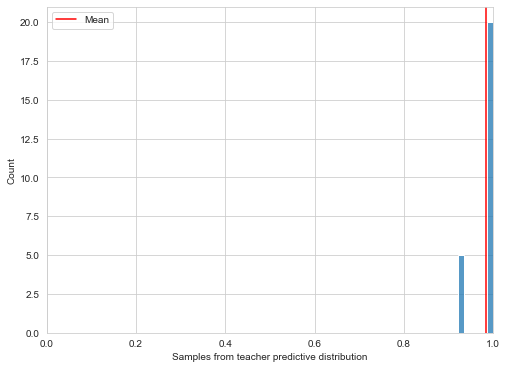

In [32]:
# pick random sequence, plot all raw predictions for this sequence
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

random_sequence = np.random.choice(teacher_description.index)
random_sequence_df = transfer_df[transfer_df["sequences"] == random_sequence]

random_seq_mean, random_seq_std_dev = teacher_description.loc[random_sequence, :]["pred_mean"], teacher_description.loc[random_sequence]["pred_std_dev"]

plt.figure(figsize=(8, 6))
sns.histplot(random_sequence_df["predictions"])
plt.axvline(random_seq_mean, color="red", label="Mean")
plt.xlabel("Samples from teacher predictive distribution")
plt.xlim(0, 1)
plt.legend();